# Exploring the 2020 UK Gender Pay Gap Data with Python 

In 2020, UK employers published their UK Gender Pay Gap Data comparing men and women’s average pay. 

The dataset is available via this link - https://gender-pay-gap.service.gov.uk/viewing/download 


# Aim and objectives

This exercise explores the the 2020 UK Gender Pay Gap Data via the following:

- Read the dataset using Pandas
- Clean and filter the data using Pandas
- Evaluate some descriptive statistics (e.g. Mean)
- Compare the 2020 UK gender pay gap across different sectors (e.g. NHS, University) and cities (London, Liverpool)
- Visualise the data (e.g. histogram, bar chart) using Matplotlib and plotly 

# Data manipulation and analysis library

In [1]:
import pandas as pd 

# Data visualisation libraries

In [36]:
import matplotlib.pyplot as plt 
import plotly.express as px

#We'll compare plots from both libraries 

In [37]:
df = pd.read_csv("https://gender-pay-gap.service.gov.uk/viewing/download-data/2020") 

#import the file without downloading it locally

In [40]:
df.head(3)

#let's take a look at our dataset

,EmployerName,EmployerId,Address,PostCode,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,19070,"Aberystwyth University, Penglais, Ceredigion, ...",sy23 3fl,RC000641,NaN,10.3,8.7,NaN,NaN,...,55.0,58.0,42.0,https://www.aber.ac.uk/en/equality/genderpayga...,Elizabeth Treasure (Vice-Chancellor),1000 to 4999,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,False,2021/10/06 00:00:00,2021/04/15 09:57:16
1,1825 FINANCIAL PLANNING AND ADVICE LIMITED,19795,"Bow Bells House, 1 Bread Street, London, Unite...",EC4M 9HH,01447544,"64999,\n66190",44.5,42.6,74.1,83.0,...,48.0,78.9,21.1,https://www.standardlifeaberdeen.com/en/career...,Julie Scott (Director),250 to 499,1825 FINANCIAL PLANNING AND ADVICE LIMITED,False,2021/10/06 00:00:00,2020/12/17 07:59:59
2,1ST HOME CARE LTD.,17484,"14b Dickson Street, Elgin Industrial Estate, D...",KY12 7SN,SC272838,"86900,\n88100",-3.2,0.0,NaN,NaN,...,92.0,8.0,92.0,NaN,David Sargent (Group Chief Executive Officer),Less than 250,1ST HOME CARE LTD.,False,2021/10/06 00:00:00,2021/02/04 09:40:59


In [52]:
#How many rows (i.e. records) are in our dataset

len(df)

4331

In [42]:
df = pd.DataFrame(df, columns=["EmployerName",
                               "Address",
                               "DiffMeanHourlyPercent", 
                               "EmployerSize"])

#We only need the selected columns (or headers)

In [43]:
df.head(3)

,EmployerName,Address,DiffMeanHourlyPercent,EmployerSize
0,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,"Aberystwyth University, Penglais, Ceredigion, ...",10.3,1000 to 4999
1,1825 FINANCIAL PLANNING AND ADVICE LIMITED,"Bow Bells House, 1 Bread Street, London, Unite...",44.5,250 to 499
2,1ST HOME CARE LTD.,"14b Dickson Street, Elgin Industrial Estate, D...",-3.2,Less than 250


In [51]:
#type of each column within the dataset

df.dtypes

EmployerName              object
Address                   object
DiffMeanHourlyPercent    float64
EmployerSize              object
dtype: object

In [50]:
#are there empty cells within our dataset?

df.isnull().sum()

EmployerName             0
Address                  0
DiffMeanHourlyPercent    0
EmployerSize             0
dtype: int64

In [49]:
#for this exercise, we'll drop empty rows

df = df.dropna()

In [11]:
len(df)

4331

In [47]:
#Let's get some initial descriptive statistics

df.describe()

,DiffMeanHourlyPercent
count,4331.000000
mean,14.167721
std,13.477007
min,-101.000000
25%,5.500000
50%,13.400000
75%,22.300000
max,100.000000


In [13]:
UK_Mean = df.DiffMeanHourlyPercent.mean()

In [14]:
UK_Mean

14.167721080581876

# Compare similar plots made using Matplotlib and Plotly

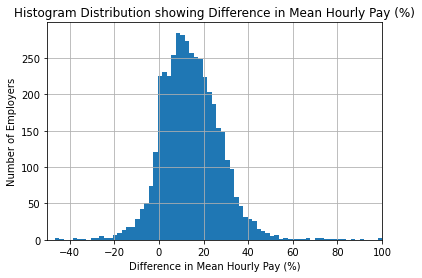

In [106]:
# Basic histogram to show distribution of "Difference in Mean Hourly Pay (%)" using Matplotlib

df.hist(column="DiffMeanHourlyPercent", bins=100)
plt.xlim(-50,100)
plt.xlabel("Difference in Mean Hourly Pay (%)")
plt.ylabel("Number of Employers")
plt.title("Histogram Distribution showing Difference in Mean Hourly Pay (%)");

In [107]:
# Basic histogram to show distribution of "Difference in Mean Hourly Pay (%)" using Plotly

#Compare the difference between both plots. Thoughts?

#Plotly provides a more interactive feature.

fig = px.histogram(df, 
                   x="DiffMeanHourlyPercent",
                   nbins=100,
                   range_x=(-50,100),
                   labels=dict(DiffMeanHourlyPercent="Difference in Mean Hourly Pay (%)")               
                   )

fig.update_layout(title_text="Histogram distribution showing difference in Mean Hourly Pay (%)")


fig.show()

In [77]:
#Let's get the count and distribution for each employer size

df.EmployerSize.value_counts()

250 to 499        1697
1000 to 4999      1058
500 to 999        1009
5000 to 19,999     270
Less than 250      156
Not Provided        95
20,000 or more      46
Name: EmployerSize, dtype: int64

In [78]:
#Let's plot the distribution for each employer size using Plotly

fig = px.histogram(df, 
                   x="EmployerSize",
                   labels=dict(EmployerSize="Employer Size"),
                   category_orders=dict(EmployerSize=["Less than 250","250 to 499", "500 to 999", "1000 to 4999",
                                                     "5000 to 19,999", "20,000 or more","Not Provided" 
                                                     ]))

fig.update_traces(marker_color="green")

fig.update_layout(title_text="Histogram distribution showing the proportion across different employer sizes")


fig.show()

# Filtering data for four UK cities


In [19]:
London = df[df["Address"].str.contains("London" , case=False)]
Liverpool = df[df["Address"].str.contains("Liverpool" , case=False)| df["Address"].str.contains("Merseyside", case=False)]
Manchester = df[df["Address"].str.contains("Manchester" , case=False)]
Birmingham = df[df["Address"].str.contains("Birmingham", case=False)]

In [20]:
London.describe()

,DiffMeanHourlyPercent
count,1021.000000
mean,16.685602
std,14.098328
min,-101.000000
25%,7.600000
50%,16.000000
75%,24.700000
max,83.100000


In [79]:
#Let's assign the mean for each city to a variable

London_Mean = London.DiffMeanHourlyPercent.mean()
Liverpool_Mean = Liverpool.DiffMeanHourlyPercent.mean()
Manchester_Mean = Manchester.DiffMeanHourlyPercent.mean()
Birmingham_Mean = Birmingham.DiffMeanHourlyPercent.mean()

In [80]:
London_Mean

16.685602350636625

# Data visualisation and comparison across UK cities

In [23]:
labels = ["London_Mean", "Liverpool_Mean", "Manchester_Mean", "Birmingham_Mean", "UK_Mean"]
Mean_Values = [London_Mean, Liverpool_Mean, Manchester_Mean, Birmingham_Mean, UK_Mean]

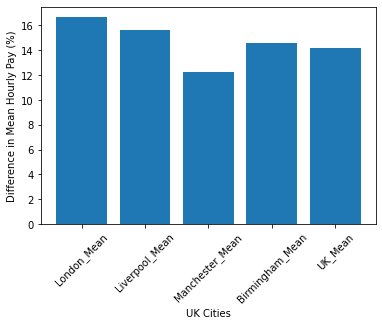

In [98]:
# Data visualisation and comparison across UK cities using Matplotlib

plt.bar(labels, Mean_Values)
plt.xlabel("UK Cities")
plt.ylabel("Difference in Mean Hourly Pay (%)")
plt.title("");
plt.xticks(rotation=45)
plt.show;

In [122]:
# Data visualisation and comparison across UK cities using Plotly

colors = ['lightslategray'] * 5
colors[4] = 'crimson'

fig = px.bar(x=labels, y=Mean_Values, 
            labels=dict(y="Difference in Mean Hourly Pay (%)", x="UK Cities"), text=Mean_Values)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(title_text="Difference in Mean Hourly Pay (%) across different UK Cities")
fig.update_traces(marker_color=colors)


fig.show()



# Filtering data for four sectors (university, football, NHS, bank)

In [100]:
University = df[df["EmployerName"].str.contains("University", case=False)]
Football = df[df["EmployerName"].str.contains("football", case=False)]
NHS = df[df["EmployerName"].str.contains("NHS", case=False)]
Bank = df[df["EmployerName"].str.contains("Bank", case=False)]


In [101]:
University.head(3)

,EmployerName,Address,DiffMeanHourlyPercent,EmployerSize
0,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,"Aberystwyth University, Penglais, Ceredigion, ...",10.3,1000 to 4999
67,AECC UNIVERSITY COLLEGE,"Parkwood Campus, Parkwood Road, Bournemouth, E...",26.8,Less than 250
167,Anglia Ruskin University,"Bishop Hall Lane, Chelmsford, Essex, CM1 1SQ",9.7,1000 to 4999


In [102]:
#Let's assign the means to respective variables

University_Mean = University.DiffMeanHourlyPercent.mean()
Football_Mean = Football.DiffMeanHourlyPercent.mean()
NHS_Mean = NHS.DiffMeanHourlyPercent.mean()
Bank_Mean = Bank.DiffMeanHourlyPercent.mean()

In [103]:
University.DiffMeanHourlyPercent.mean()

15.844444444444441

In [104]:
Sector_Labels = ["University_Mean", "Football_Mean", "NHS_Mean", "Bank_Mean", "UK_Mean"]
Sector_Mean_Values = [University_Mean, Football_Mean, NHS_Mean, Bank_Mean, UK_Mean]

In [119]:
colors = ['lightslategray'] * 5
colors[4] = 'crimson'

fig = px.bar(x=Sector_Labels, y=Sector_Mean_Values, 
            labels=dict(y="Difference in Mean Hourly Pay (%)", x="Sectors"), text=Sector_Mean_Values)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(title_text="Difference in Mean Hourly Pay (%) across different Sectors")
fig.update_traces(marker_color=colors)

fig.show()